In [18]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 현재경로 확인
os.getcwd()

'/Users/david_king/Desktop/Everything/11_Git/ML_code/01_회귀분석'

In [4]:
# 데이터 불러오기
corolla = pd.read_csv("../00_Data/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [8]:
nCar = corolla.shape[0]
nVar = corolla.shape[1]

print('nCar: %d' % nCar, '\nnVar: %d' % nVar )

nCar: 1436 
nVar: 37


### 범주형 변수를 이진형 변수로 변환

In [9]:
# 가변수 생성
dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
# 연료타입에 대한 위치 인덱스 저장
p_idx = np.array(corolla['Fuel_Type'] == 'Petrol')
d_idx = np.array(corolla['Fuel_Type'] == 'Diesel')
c_idx = np.array(corolla['Fuel_Type'] == 'CNG')

p_idx

array([False, False, False, ...,  True,  True,  True])

In [13]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
dummy_p[p_idx] = 1 # Petrol
dummy_d[d_idx] = 1 # Diesel
dummy_c[c_idx] = 1 # CNG

dummy_d

array([1, 1, 1, ..., 0, 0, 0])

### 불필요한 변수 제거 및 가변수 추가

In [15]:
# np or dict to DF
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})
display(Fuel.head())

# column slice
corolla_ = corolla.dropna().drop(['Id','Model','Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat([corolla_, Fuel], axis=1)
display(mlr_data)

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,0,1,1,1,0,0,0,1,0,0
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,0,1,1,0,0,0,1,0,0
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,0,0,1,0,0,0,1,0,0
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,1,0,0,0,1,0,0


In [16]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


### 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [19]:
feature_columns = list(mlr_data.columns.difference(['Price']))

X = mlr_data[feature_columns]
y = mlr_data['Price']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [20]:
# Train the MLR / 회귀모델 적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [21]:
fitted_full_model.summary() ## R2가 높고, 대부분의 변수들이 유의

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     304.7
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:56:11   Log-Likelihood:                -8469.6
No. Observations:                1005   AIC:                         1.701e+04
Df Residuals:                     971   BIC:                         1.717e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -269.5824    136.914     -1.969      0.049    -538.264      -0.901
Age_08_04         -118.5496      4.200    -28.226      0.000    -126.792    -110.307
Airbag_1          -207.1468    290.152     -0.714      0.475    -776.543     362.249
Airbag_2           -66.5700    136.410     -0.488      0.626    -334.263     201.123
Airco              205.7446     98.242      2.094      0.036      12.953     398.536
Automatic          336.5594    164.522      2.046      0.041      13.700     659.419
Automatic_airco   2578.5501    199.598     12.919      0.000    2186.856    2970.244
BOVAG_Guarantee    539.8387    133.111      4.056      0.000     278.620     801.058
Backseat_Divider  -297.7389    134.638     -2.211      0.027    -561.955     -33.523
Boardcomputer     -267.1097    126.376     -2.114      0.035    -515.111     -19.108
CD_Player          185.1021    107.326      1.725      0.085     -25.515     395.719
CNG              -1206.5114    244.178     -4.941      0.000   -1685.688    -727.334
Central_Lock      -160.9708    150.354     -1.071      0.285    -456.026     134.085
Cylinders           -0.0338      0.002    -13.509      0.000      -0.039      -0.029
Diesel             268.3357    187.916      1.428      0.154    -100.433     637.104
Doors               66.3273     42.910      1.546      0.122     -17.880     150.534
Gears              139.3202    253.534      0.550      0.583    -358.217     636.857
Guarantee_Period    70.4324     14.321      4.918      0.000      42.329      98.535
HP                  21.4454      3.817      5.618      0.000      13.954      28.937
KM                  -0.0179      0.001    -12.948      0.000      -0.021      -0.015
Met_Color           -5.1189     81.194     -0.063      0.950    -164.455     154.218
Metallic_Rim       287.5097    102.366      2.809      0.005      86.626     488.394
Mfg_Month         -100.5343     11.095     -9.061      0.000    -122.308     -78.761
Mfg_Year             1.3376      0.923      1.450      0.147      -0.473       3.148
Mfr_Guarantee      165.0665     78.897      2.092      0.037      10.239     319.894
Mistlamps          -17.4139    117.378     -0.148      0.882    -247.759     212.931
Petrol             938.1673    203.101      4.619      0.000     539.601    1336.734
Power_Steering     257.0997    326.889      0.787      0.432    -384.391     898.590
Powered_Windows    463.1265    152.066      3.046      0.002     164.710     761.543
Quarterly_Tax       12.5368      1.905      6.581      0.000       8.798      16.275
Radio             2876.5605   1175.015      2.448      0.015     570.700    5182.421
Radio_cassette   -2851.8297   1173.726     -2.430      0.015   -5155.162    -548.498
Sport_Model        407.4871     95.018      4.289      0.000     221.023     593.951
Tow_Bar           -208.

### VIF를 통한 다중공선성 확인

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif['features'] = mlr_data.columns

vif

/Users/david_king/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/david_king/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


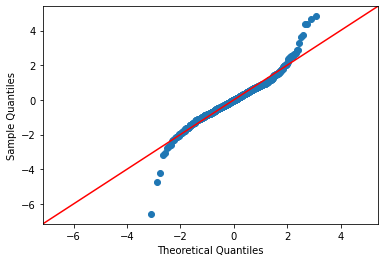

In [24]:
# 학습데이터 잔차 확인
import matplotlib.pyplot as plt

# 잔차
res = fitted_full_model.resid
pred_y = fitted_full_model.predict(train_x)

# q-q plot (정규분포 확인)
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

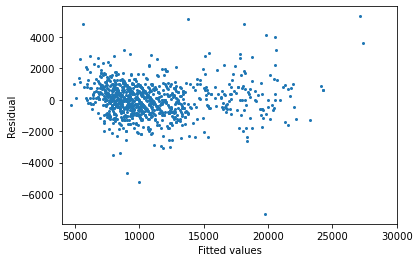

In [32]:
# 잔차 패턴 확인
plt.scatter(pred_y, res, s=4)
plt.xlim(4000, 30000)
plt.xlabel("Fitted values")
plt.ylabel('Residual')

In [33]:
# 검증데이터에 대해서
pred_y = fitted_full_model.predict(test_x)

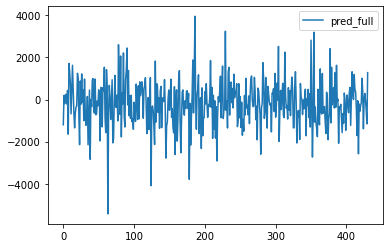

In [34]:
plt.plot(np.array(test_y - pred_y), label='pred_full')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true= test_y, y_pred= pred_y)

1245875.1318150626

# 변수선택법